In [1]:
# Install required libraries
!pip install -q contractions emoji textblob autocorrect wordcloud textstat

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Core
import pandas as pd
import numpy as np
import re
import string
import warnings
warnings.filterwarnings("ignore")

# NLP
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import textstat
import contractions
import emoji
from autocorrect import Speller
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline


In [3]:
# Load your dataset
df = pd.read_csv(r"C:\Users\HP\Downloads\Combined_Data_With_Synthetic_10k.csv")

# Keep only needed columns
df = df[['statement', 'status']]

# Remove duplicates and reset index
df.drop_duplicates(subset='statement', inplace=True)
df.reset_index(drop=True, inplace=True)

# View sample
print("Sample data:\n", df.head())


Sample data:
                                            statement   status
0                                         oh my gosh  Anxiety
1  trouble sleeping, confused mind, restless hear...  Anxiety
2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3  I've shifted my focus to something else but I'...  Anxiety
4  I'm restless and restless, it's been a month n...  Anxiety


In [4]:
df.describe()

,statement,status
count,51103,51074
unique,51103,7
top,oh my gosh,Normal
freq,1,16039


In [5]:
# Remove rows where 'status' is null (NaN)
df = df[df['status'].notnull()]

# Reset index after removal
df.reset_index(drop=True, inplace=True)

# Confirm it's clean
print("After removing null status:\n", df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51074 entries, 0 to 51073
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  51073 non-null  object
 1   status     51074 non-null  object
dtypes: object(2)
memory usage: 798.2+ KB
After removing null status:
 None


In [6]:

df.describe()

,statement,status
count,51073,51074
unique,51073,7
top,oh my gosh,Normal
freq,1,16039


In [7]:
#Removing missing data
df.dropna(inplace = True)
df.isna().sum()


statement    0
status       0
dtype: int64

In [8]:
df.status.value_counts()

status
Normal                  16039
Depression              15087
Suicidal                10641
Anxiety                  3617
Bipolar                  2501
Stress                   2293
Personality disorder      895
Name: count, dtype: int64

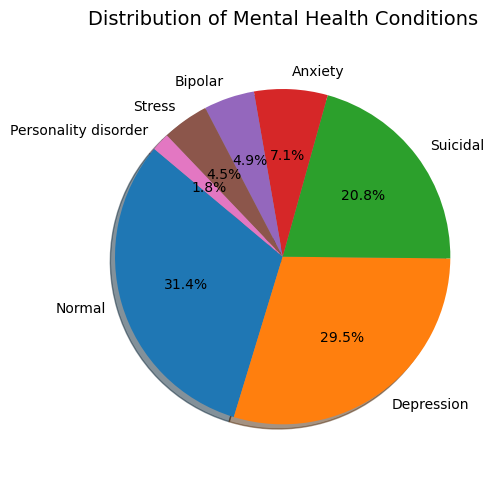

In [9]:
status_counts = df['status'].value_counts()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(5, 5))
plt.pie(status_counts,
        labels=status_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        shadow=True)

plt.title('Distribution of Mental Health Conditions', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [10]:
## data cleaning 

In [11]:
stop_words = set(stopwords.words('english'))


def remove_patterns(text):
    text = re.sub(r"http[s]?://\S+", "", text)
    text = re.sub(r"\[.*?\]\(.*?\)", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text.strip()

# Lowercase + clean text
df['statement'] = df['statement'].astype(str).str.lower()
df['statement'] = df['statement'].apply(remove_patterns)

# Tokenize clean text
df['tokens'] = df['statement'].apply(word_tokenize)
df.head()


,statement,status,tokens
0,oh my gosh,Anxiety,"[oh, my, gosh]"
1,trouble sleeping confused mind restless heart ...,Anxiety,"[trouble, sleeping, confused, mind, restless, ..."
2,all wrong back off dear forward doubt stay in ...,Anxiety,"[all, wrong, back, off, dear, forward, doubt, ..."
3,ive shifted my focus to something else but im ...,Anxiety,"[ive, shifted, my, focus, to, something, else,..."
4,im restless and restless its been a month now ...,Anxiety,"[im, restless, and, restless, its, been, a, mo..."


In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [13]:
import nltk
nltk.data.path


['C:\\Users\\HP/nltk_data',
 'C:\\Users\\HP\\anaconda3\\nltk_data',
 'C:\\Users\\HP\\anaconda3\\share\\nltk_data',
 'C:\\Users\\HP\\anaconda3\\lib\\nltk_data',
 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data',
 'C:\\nltk_data',
 'D:\\nltk_data',
 'E:\\nltk_data']

In [14]:
# feature engineering

In [15]:
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import textstat

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# feature engineering
df['num_of_characters'] = df['statement'].str.len()

df['num_of_sentences'] = df['statement'].apply(lambda x: len(sent_tokenize(x)))

df['num_of_words'] = df['statement'].apply(lambda x: len(word_tokenize(x)))

df['avg_word_length'] = df['statement'].apply(
    lambda x: np.mean([len(word) for word in word_tokenize(x)]) if word_tokenize(x) else 0
)

df['num_of_unique_words'] = df['statement'].apply(lambda x: len(set(word_tokenize(x))))

df['num_of_stopwords'] = df['statement'].apply(
    lambda x: len([word for word in word_tokenize(x.lower()) if word in stop_words])
)

df['polarity'] = df['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['subjectivity'] = df['statement'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df['readability'] = df['statement'].apply(lambda x: textstat.flesch_reading_ease(x))

df['num_of_punctuations'] = df['statement'].apply(lambda x: len([ch for ch in x if ch in string.punctuation]))

df['num_of_uppercase_words'] = df['statement'].apply(lambda x: len([word for word in word_tokenize(x) if word.isupper()]))

df['avg_sentence_length'] = df['statement'].apply(
    lambda x: np.mean([len(word_tokenize(sent)) for sent in sent_tokenize(x)]) if sent_tokenize(x) else 0
)

df['lexical_diversity'] = df['num_of_unique_words'] / df['num_of_words'].replace(0, np.nan)

df['stopword_ratio'] = df['num_of_stopwords'] / df['num_of_words'].replace(0, np.nan)

df['num_exclamations'] = df['statement'].apply(lambda x: x.count('!'))

df['num_questions'] = df['statement'].apply(lambda x: x.count('?'))

# Final feature column list (without POS features)
feature_columns = [
    'num_of_characters', 'num_of_sentences', 'num_of_words', 'avg_word_length',
    'num_of_unique_words', 'num_of_stopwords', 'polarity', 'subjectivity', 'readability',
    'num_of_punctuations', 'num_of_uppercase_words', 'avg_sentence_length',
    'lexical_diversity', 'stopword_ratio', 'num_exclamations', 'num_questions'
]

# Display sample features
df[feature_columns].head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,num_of_characters,num_of_sentences,num_of_words,avg_word_length,num_of_unique_words,num_of_stopwords,polarity,subjectivity,readability,num_of_punctuations,num_of_uppercase_words,avg_sentence_length,lexical_diversity,stopword_ratio,num_exclamations,num_questions
0,10,1,3,2.666667,3,1,0.0000,0.0000,119.190000,0,0,3.0,1.000000,0.333333,0,0
1,61,1,10,5.200000,10,3,-0.3000,0.4500,78.245000,0,0,10.0,1.000000,0.300000,0,0
2,75,1,14,4.428571,13,5,-0.2500,0.4500,89.896429,0,0,14.0,0.928571,0.357143,0,0
3,59,1,11,4.454545,11,3,0.0000,0.0000,80.306364,0,0,11.0,1.000000,0.272727,0,0
4,66,1,14,3.785714,13,8,-0.3125,0.6875,95.939286,0,0,14.0,0.928571,0.571429,0,0


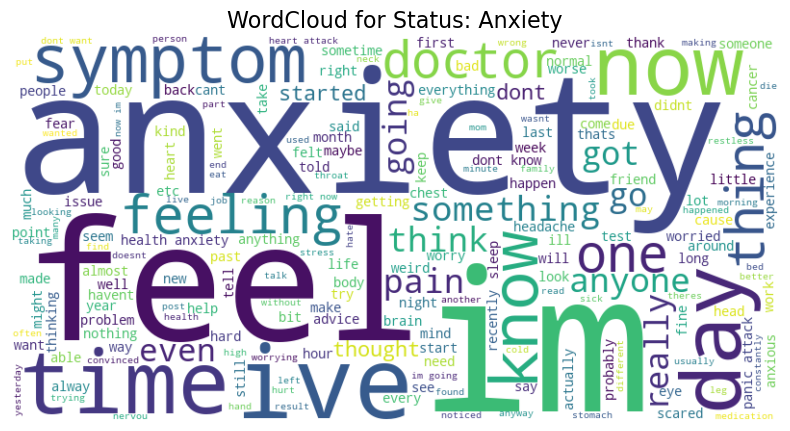

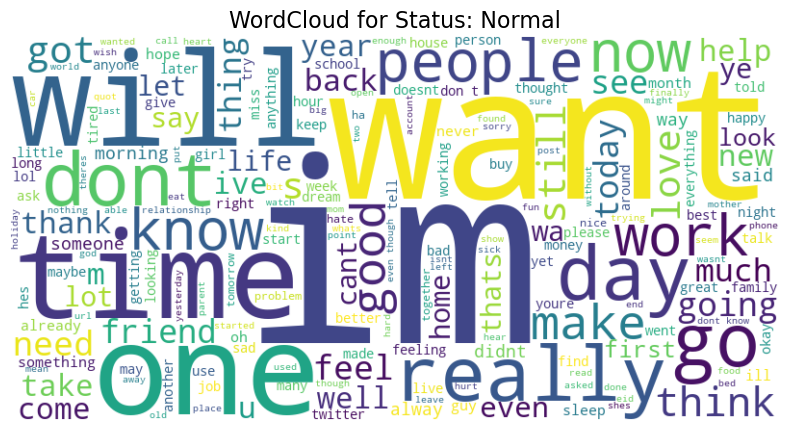

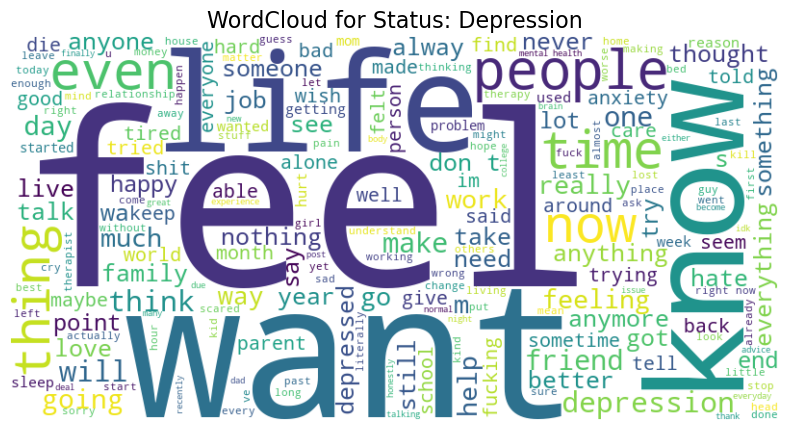

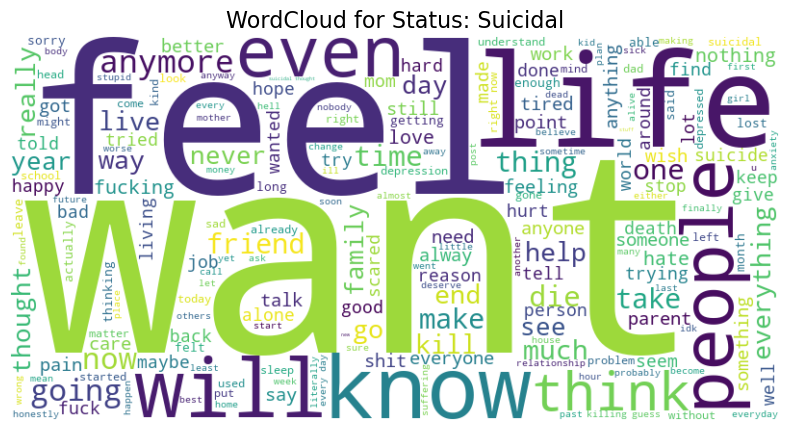

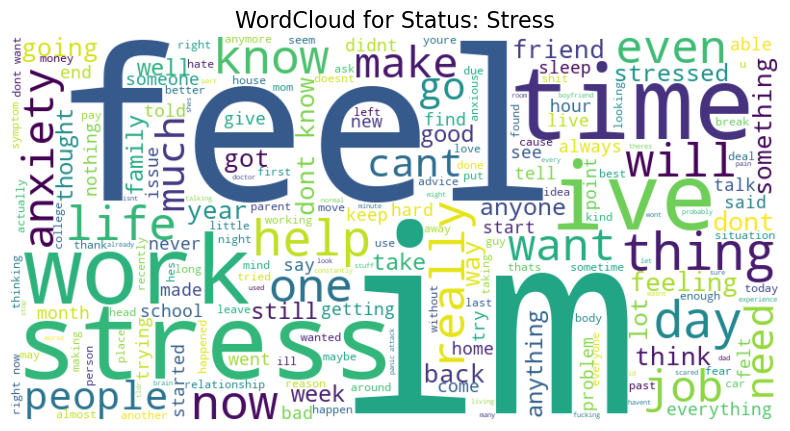

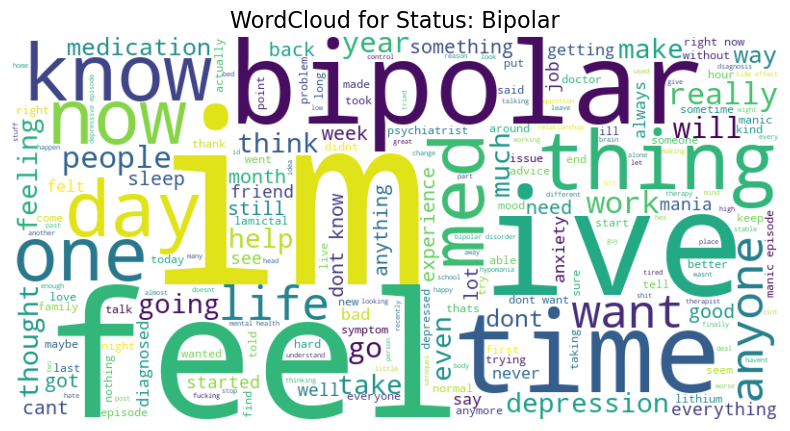

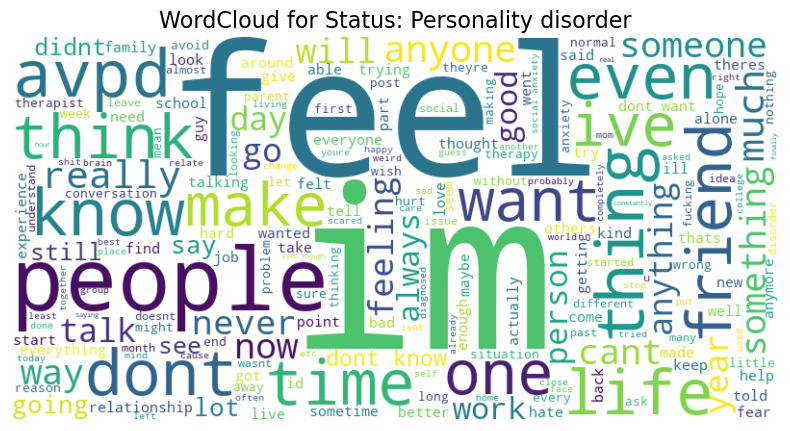

In [16]:
statuses = df['status'].unique()

for status in statuses:
    # Create string of tokens for each category
    tokens_list = df[df['status'] == status]['tokens'].dropna().apply(lambda x: ' '.join(x)).tolist()
    if not tokens_list:
        continue  # skip empty category

    tokens_data = ' '.join(tokens_list)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tokens_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for Status: {status}', fontsize=16)
    plt.show()


In [17]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to each token in the 'tokens' column
df['tokens_stemmed'] = df['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Display original tokens and stemmed tokens side-by-side with status
df[['status', 'tokens', 'tokens_stemmed']].head()


,status,tokens,tokens_stemmed
0,Anxiety,"[oh, my, gosh]","[oh, my, gosh]"
1,Anxiety,"[trouble, sleeping, confused, mind, restless, ...","[troubl, sleep, confus, mind, restless, heart,..."
2,Anxiety,"[all, wrong, back, off, dear, forward, doubt, ...","[all, wrong, back, off, dear, forward, doubt, ..."
3,Anxiety,"[ive, shifted, my, focus, to, something, else,...","[ive, shift, my, focu, to, someth, els, but, i..."
4,Anxiety,"[im, restless, and, restless, its, been, a, mo...","[im, restless, and, restless, it, been, a, mon..."


In [18]:
# Create enriched subset with target, tokens, and all engineered features
df_subset = df[[
    'status', 'tokens', 'tokens_stemmed',
    
    # Existing features
    'num_of_characters', 'num_of_sentences', 'num_of_words',
    'avg_word_length', 'num_of_unique_words', 'num_of_stopwords',
    'polarity', 'subjectivity', 'readability',
    
    # Additional features
    'num_of_punctuations', 'num_of_uppercase_words', 'avg_sentence_length',
    'lexical_diversity', 'stopword_ratio', 'num_exclamations',
    'num_questions'
    # Removed: 'noun_verb_ratio'
]]

# Display first few rows of the enriched dataset
print(df_subset.head(5))


    status                                             tokens  \
0  Anxiety                                     [oh, my, gosh]   
1  Anxiety  [trouble, sleeping, confused, mind, restless, ...   
2  Anxiety  [all, wrong, back, off, dear, forward, doubt, ...   
3  Anxiety  [ive, shifted, my, focus, to, something, else,...   
4  Anxiety  [im, restless, and, restless, its, been, a, mo...   

                                      tokens_stemmed  num_of_characters  \
0                                     [oh, my, gosh]                 10   
1  [troubl, sleep, confus, mind, restless, heart,...                 61   
2  [all, wrong, back, off, dear, forward, doubt, ...                 75   
3  [ive, shift, my, focu, to, someth, els, but, i...                 59   
4  [im, restless, and, restless, it, been, a, mon...                 66   

   num_of_sentences  num_of_words  avg_word_length  num_of_unique_words  \
0                 1             3         2.666667                    3   
1       

In [19]:
from gensim.models import Word2Vec

# Train Word2Vec
w2v_model = Word2Vec(sentences=df['tokens_stemmed'], vector_size=100, window=5, min_count=1, sg=1, workers=4)

# Convert sentence to average vector
def vectorize_sentence(tokens, model, vector_size=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

# Apply to DataFrame
df['w2v_vector'] = df['tokens_stemmed'].apply(lambda x: vectorize_sentence(x, w2v_model))


In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Final Word2Vec embeddings
X_w2v = np.stack(df['w2v_vector'].values)

# Updated numeric feature columns
numeric_cols = [
    'num_of_characters', 'num_of_sentences', 'num_of_words',
    'avg_word_length', 'num_of_unique_words', 'num_of_stopwords',
    'polarity', 'subjectivity', 'readability',
    'num_of_punctuations', 'num_of_uppercase_words', 'avg_sentence_length',
    'lexical_diversity', 'stopword_ratio', 'num_exclamations',
    'num_questions'
]

# Scale numeric features
X_numeric = df[numeric_cols].values
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Combine Word2Vec and scaled numeric features
X_combined = np.hstack([X_w2v, X_numeric_scaled])
print("✅ Combined input shape:", X_combined.shape)


✅ Combined input shape: (51073, 116)



 XGBoost (Tuned) Report:
✅ Train Accuracy: 0.8635
✅ Test Accuracy: 0.7284
                      precision    recall  f1-score   support

             Anxiety       0.73      0.67      0.70       723
             Bipolar       0.62      0.48      0.54       500
          Depression       0.64      0.73      0.68      3018
              Normal       0.87      0.94      0.90      3208
Personality disorder       0.58      0.27      0.37       179
              Stress       0.56      0.38      0.45       459
            Suicidal       0.68      0.60      0.64      2128

            accuracy                           0.73     10215
           macro avg       0.67      0.58      0.61     10215
        weighted avg       0.72      0.73      0.72     10215



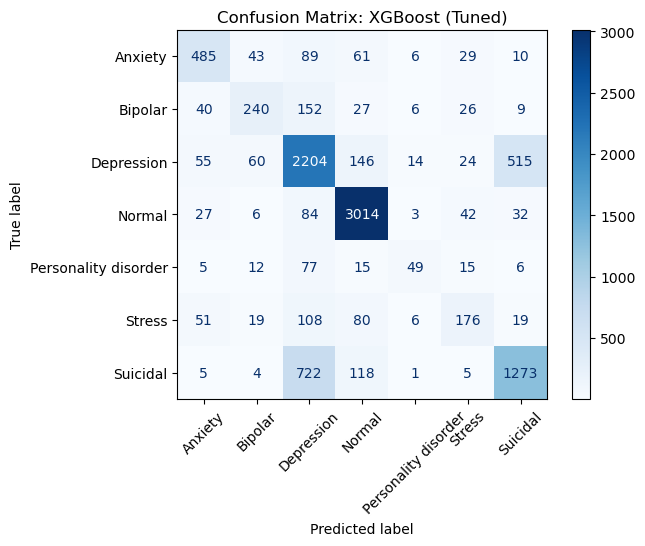


 Logistic Regression Report:
✅ Train Accuracy: 0.6885
✅ Test Accuracy: 0.6905
                      precision    recall  f1-score   support

             Anxiety       0.68      0.71      0.69       723
             Bipolar       0.51      0.60      0.55       500
          Depression       0.71      0.58      0.64      3018
              Normal       0.86      0.87      0.87      3208
Personality disorder       0.23      0.54      0.32       179
              Stress       0.36      0.63      0.46       459
            Suicidal       0.67      0.61      0.64      2128

            accuracy                           0.69     10215
           macro avg       0.58      0.65      0.60     10215
        weighted avg       0.71      0.69      0.70     10215



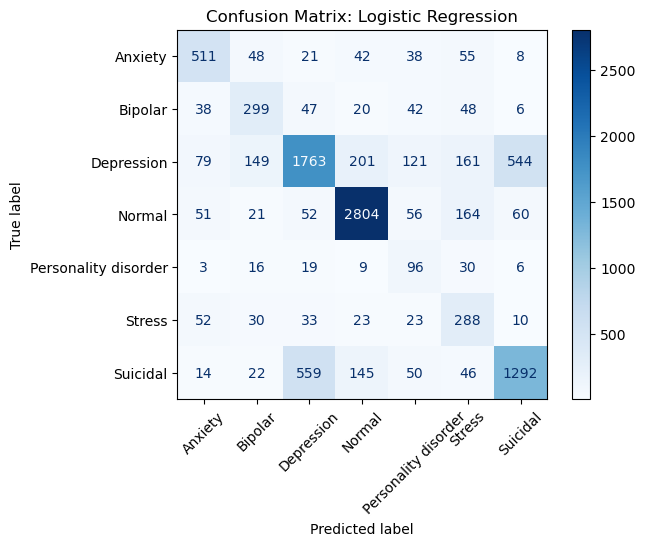


 Random Forest Report:
✅ Train Accuracy: 0.6563
✅ Test Accuracy: 0.6043
                      precision    recall  f1-score   support

             Anxiety       0.66      0.61      0.63       723
             Bipolar       0.36      0.59      0.44       500
          Depression       0.73      0.28      0.40      3018
              Normal       0.83      0.88      0.86      3208
Personality disorder       0.18      0.59      0.27       179
              Stress       0.27      0.58      0.36       459
            Suicidal       0.54      0.66      0.60      2128

            accuracy                           0.60     10215
           macro avg       0.51      0.60      0.51     10215
        weighted avg       0.67      0.60      0.60     10215



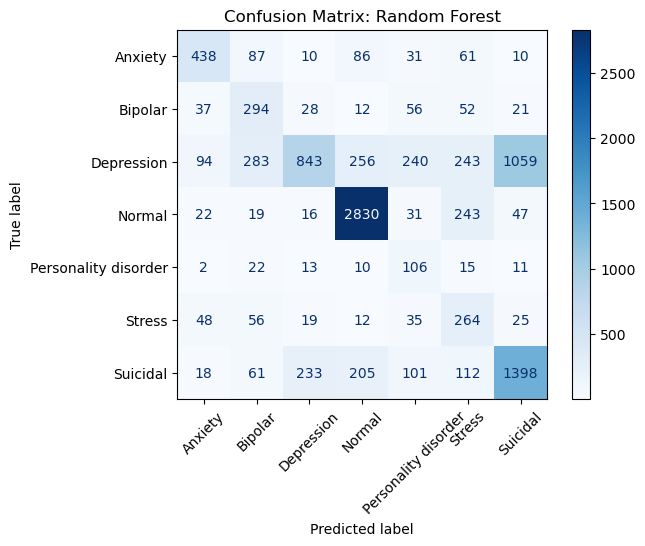


📊 Model Comparison Summary:
                     Accuracy  Balanced Accuracy  F1 Macro  F1 Weighted
Model                                                                  
XGBoost (Tuned)      0.728439           0.582290  0.612828     0.721334
Logistic Regression  0.690455           0.647702  0.595712     0.697148
Random Forest        0.604307           0.597086  0.509809     0.599448


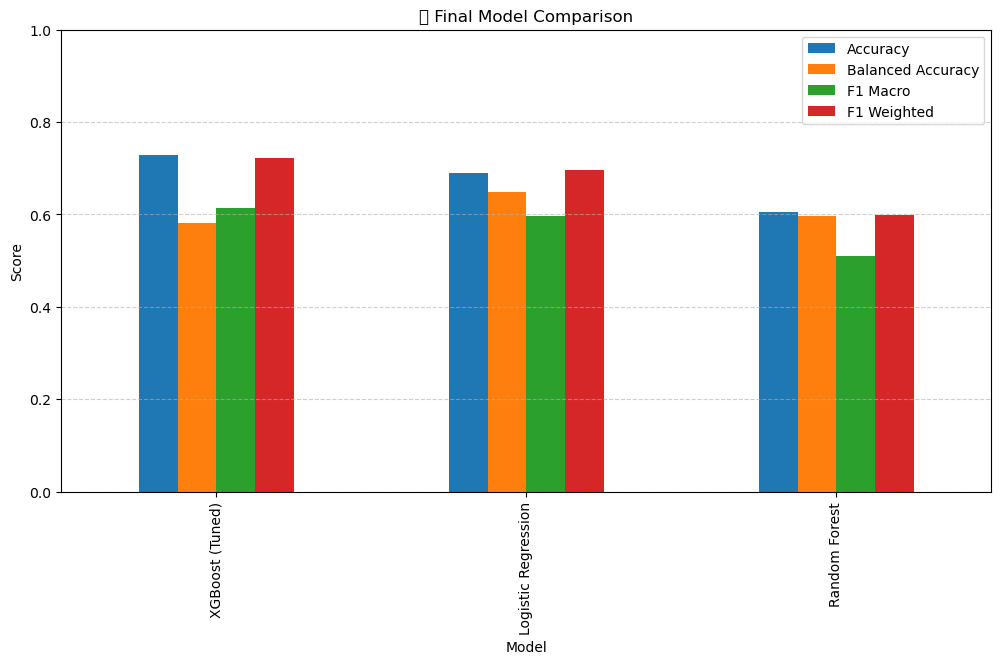

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# -----------------------------
# Encode labels
# -----------------------------
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['status'])

# -----------------------------
# Handle NaN (important)
# -----------------------------
X_combined = np.nan_to_num(X_combined, nan=0.0)

# -----------------------------
# Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=101)

# -----------------------------
# Evaluation Function
# -----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"\n {model_name} Report:")
    print(f"✅ Train Accuracy: {train_acc:.4f}")
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(classification_report(y_test, y_pred_test, target_names=lbl_enc.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbl_enc.classes_)
    disp.plot(xticks_rotation=45, cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    return model

# -----------------------------
# XGBoost (Tuned)
# -----------------------------
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=101,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    gamma=2
)
xgb_model = evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost (Tuned)")

# -----------------------------
# Logistic Regression
# -----------------------------
log_reg = LogisticRegression(max_iter=3000, solver='liblinear', class_weight='balanced')
log_reg_model = evaluate_model(log_reg, X_train, y_train, X_test, y_test, "Logistic Regression")

# -----------------------------
# Random Forest
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=250,
    max_depth=9,
    class_weight='balanced',
    random_state=101
)
rf_model = evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# -----------------------------
# Model Comparison Summary
# -----------------------------
models = {
    'XGBoost (Tuned)': xgb_model,
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'F1 Macro': f1_score(y_test, y_pred, average='macro'),
        'F1 Weighted': f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results).set_index('Model')
print("\n📊 Model Comparison Summary:")
print(results_df)

# -----------------------------
# 📊 Plot Comparison
# -----------------------------
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('📊 Final Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

✅ TF-IDF shape: (51073, 50000)
✅ Combined shape: (51073, 50016)

🔎 XGBoost (Tuned) Report:
✅ Train Accuracy: 0.8607
✅ Test Accuracy: 0.7874
                      precision    recall  f1-score   support

             Anxiety       0.82      0.81      0.81       723
             Bipolar       0.87      0.72      0.79       500
          Depression       0.73      0.76      0.74      3018
              Normal       0.88      0.95      0.91      3208
Personality disorder       0.83      0.53      0.64       179
              Stress       0.63      0.52      0.57       459
            Suicidal       0.72      0.68      0.70      2128

            accuracy                           0.79     10215
           macro avg       0.78      0.71      0.74     10215
        weighted avg       0.78      0.79      0.78     10215



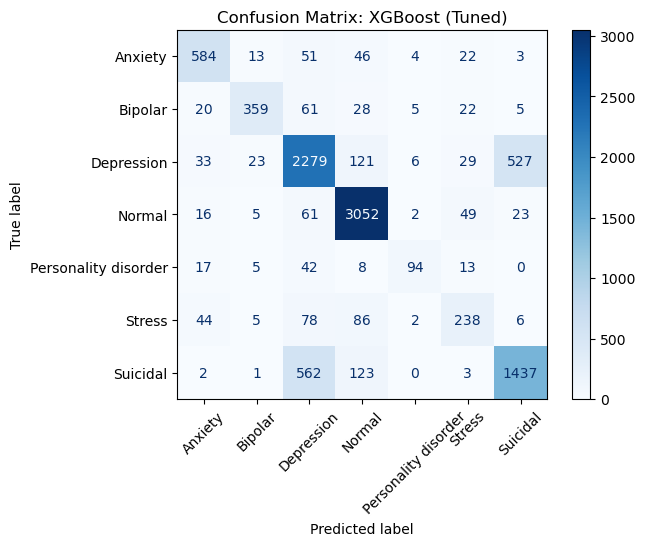


🔎 Logistic Regression Report:
✅ Train Accuracy: 0.8531
✅ Test Accuracy: 0.7765
                      precision    recall  f1-score   support

             Anxiety       0.79      0.81      0.80       723
             Bipolar       0.75      0.74      0.75       500
          Depression       0.79      0.68      0.73      3018
              Normal       0.87      0.93      0.90      3208
Personality disorder       0.55      0.63      0.59       179
              Stress       0.51      0.73      0.60       459
            Suicidal       0.71      0.70      0.71      2128

            accuracy                           0.78     10215
           macro avg       0.71      0.75      0.73     10215
        weighted avg       0.78      0.78      0.78     10215



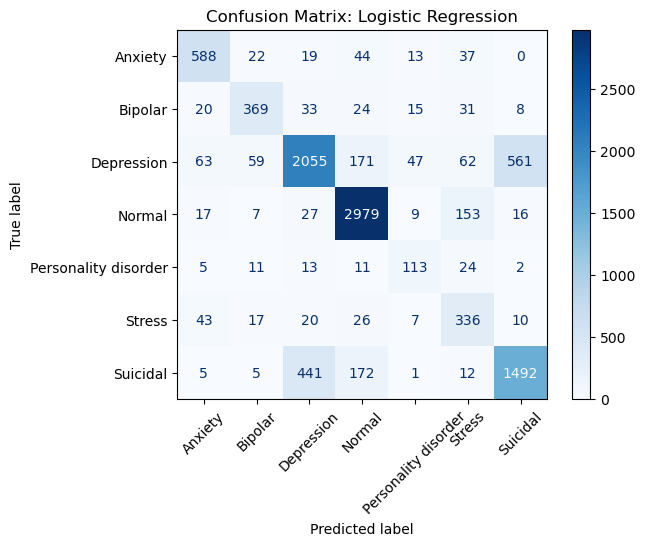


🔎 Random Forest Report:
✅ Train Accuracy: 0.6752
✅ Test Accuracy: 0.6442
                      precision    recall  f1-score   support

             Anxiety       0.79      0.54      0.64       723
             Bipolar       0.63      0.78      0.70       500
          Depression       0.87      0.31      0.46      3018
              Normal       0.70      0.92      0.80      3208
Personality disorder       0.52      0.60      0.56       179
              Stress       0.32      0.71      0.45       459
            Suicidal       0.57      0.70      0.63      2128

            accuracy                           0.64     10215
           macro avg       0.63      0.65      0.60     10215
        weighted avg       0.71      0.64      0.62     10215



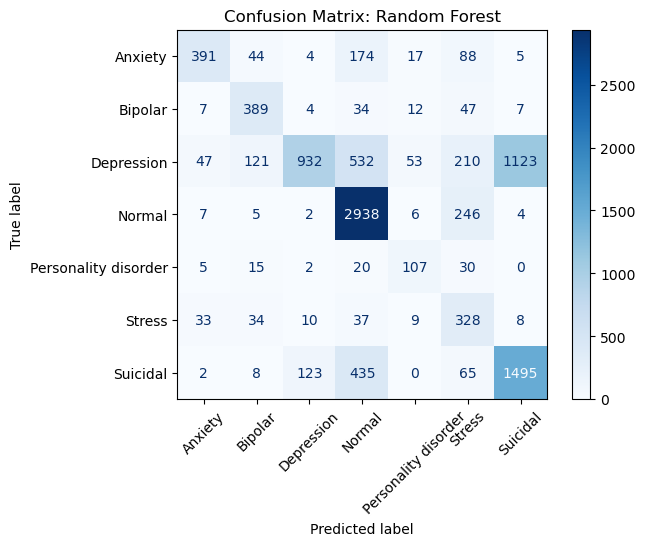


📊 Model Comparison Summary:
                     Accuracy  Balanced Accuracy  F1 Macro  F1 Weighted
Model                                                                  
XGBoost (Tuned)      0.787372           0.707313  0.737933     0.784135
Logistic Regression  0.776505           0.746464  0.725232     0.776012
Random Forest        0.644151           0.651193  0.603328     0.624662


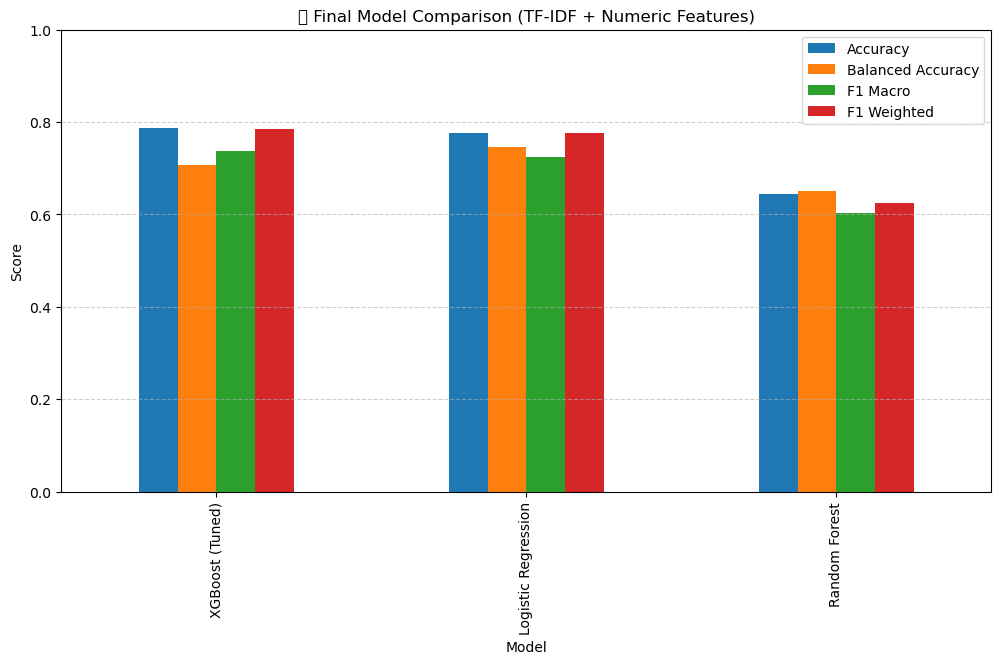

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from scipy.sparse import hstack

# -----------------------------
# 1. TF-IDF Feature Extraction
# -----------------------------
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)
X_tfidf = vectorizer.fit_transform(df['tokens_stemmed'].apply(lambda x: " ".join(x)))
print("✅ TF-IDF shape:", X_tfidf.shape)

# -----------------------------
# 2. Numerical Feature Extraction
# -----------------------------
numeric_cols = [
    'num_of_characters', 'num_of_sentences', 'num_of_words',
    'avg_word_length', 'num_of_unique_words', 'num_of_stopwords',
    'polarity', 'subjectivity', 'readability',
    'num_of_punctuations', 'num_of_uppercase_words', 'avg_sentence_length',
    'lexical_diversity', 'stopword_ratio', 'num_exclamations',
    'num_questions'
]

X_numeric = df[numeric_cols].values
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# -----------------------------
# 3. Combine TF-IDF + Numeric
# -----------------------------
X_combined = hstack([X_tfidf, X_numeric_scaled])
print("✅ Combined shape:", X_combined.shape)

# -----------------------------
# 4. Encode Target Labels
# -----------------------------
lbl_enc = LabelEncoder()
y = lbl_enc.fit_transform(df['status'])

# -----------------------------
# 5. Handle NaN in Sparse Matrix
# -----------------------------
X_combined.data = np.nan_to_num(X_combined.data, nan=0.0)

# -----------------------------
# 6. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=101)

# -----------------------------
# 7. Evaluation Function
# -----------------------------
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    print(f"\n🔎 {model_name} Report:")
    print(f"✅ Train Accuracy: {train_acc:.4f}")
    print(f"✅ Test Accuracy: {test_acc:.4f}")
    print(classification_report(y_test, y_pred_test, target_names=lbl_enc.classes_))

    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lbl_enc.classes_)
    disp.plot(xticks_rotation=45, cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

    return model

# -----------------------------
# 8. Train Models
# -----------------------------
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=101,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.5,
    reg_lambda=1.0,
    gamma=2
)
xgb_model = evaluate_model(xgb, X_train, y_train, X_test, y_test, "XGBoost ")

log_reg = LogisticRegression(max_iter=3000, solver='liblinear', class_weight='balanced')
log_reg_model = evaluate_model(log_reg, X_train, y_train, X_test, y_test, "Logistic Regression")

rf_model = RandomForestClassifier(
    n_estimators=250,
    max_depth=9,
    class_weight='balanced',
    random_state=101
)
rf_model = evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# -----------------------------
# 9. Model Comparison Summary
# -----------------------------
models = {
    'XGBoost (Tuned)': xgb_model,
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Balanced Accuracy': balanced_accuracy_score(y_test, y_pred),
        'F1 Macro': f1_score(y_test, y_pred, average='macro'),
        'F1 Weighted': f1_score(y_test, y_pred, average='weighted')
    })

results_df = pd.DataFrame(results).set_index('Model')
print("\n📊 Model Comparison Summary:")
print(results_df)

# -----------------------------
# 10. 📊 Plot Comparison
# -----------------------------
results_df.plot(kind='bar', figsize=(12, 6))
plt.title('📊 Final Model Comparison (TF-IDF + Numeric Features)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()
